# [전처리 실습]

* 도미 데이터를 넣어보면 당연히 도미가 나오겠죠?
* 도미 데이터
    - 길이: 25, 무게:150


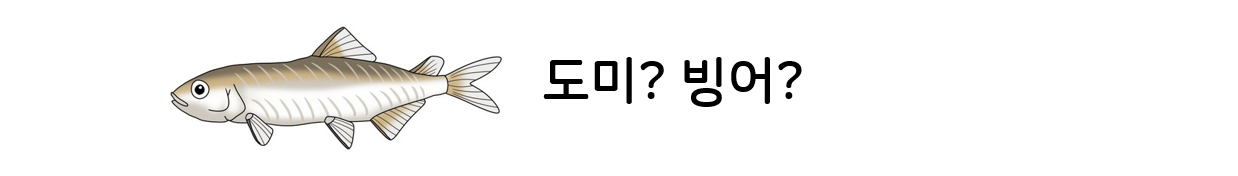

In [3]:
import pandas as pd

In [4]:
#측정한 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

#데이터 프레임으로 만들기
fish_df = pd.DataFrame(fish_data,columns=['길이','무게'])
fish_df['Label'] = fish_target

In [6]:
from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.neighbors import KNeighborsClassifier # 분류 알고리즘

#피쳐와 라벨 데이터 준비
label = fish_df['Label']
feature = fish_df.drop('Label',axis=1)

#학습/테스트 데이터 세트 준비
X_train,X_test, y_train,y_test = train_test_split(feature ,label,test_size=0.2, random_state=11)

#모델 학습
kn = KNeighborsClassifier()
kn =kn.fit(X_train,y_train)

#모델 예측
pred = kn.predict(X_test)

#모델 평가
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) 

예측 정확도: 1.0000


---

In [185]:
# 새로운 데이터 예측
# 1: 도미, 0: 빙어
kn.predict([[25,150]])



c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

* array([0], dtype=int64) 빙어가 나옴, 그러나 사진은 도미!
* 무엇이 문제지?

In [186]:
X_train.head()

,길이,무게
37,10.6,7.0
14,32.0,600.0
9,30.7,500.0
22,34.5,620.0
30,38.5,920.0


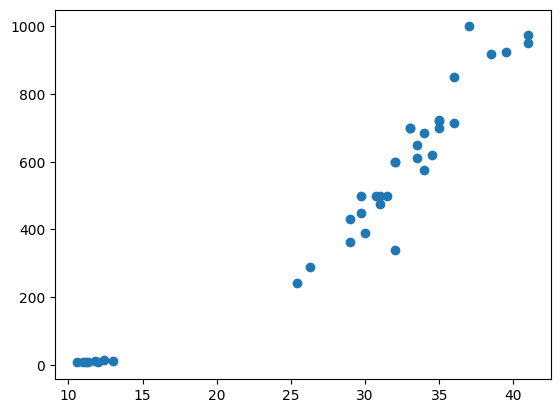

In [187]:
import matplotlib.pyplot as plt

#스케터 차트그리기

plt.scatter(X_train['길이'],X_train['무게'])
plt.show()

200 ~1000까지는 도미 , 나머지는 도미

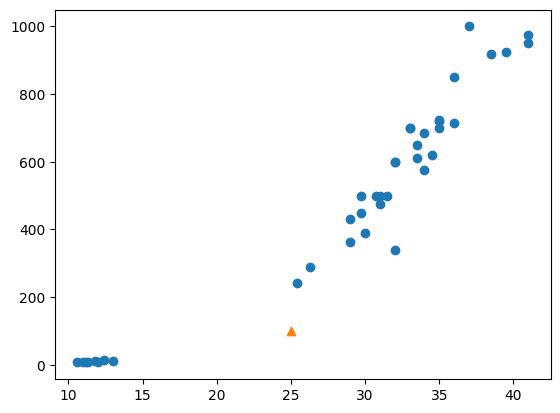

In [188]:
#스케터 차트 그리기

plt.scatter(X_train['길이'],X_train['무게'])
plt.scatter(25,100,marker='^')#새로운 측정 데이터를 '^'로 표시함.
plt.show()

* plt.scatter(25,100,marker='^')#새로운 측정 데이터를 '^'로 표시했고
* 도미데이터와 가까운데 모델의 판단은 빙어로 판단됨.

kn은 주변 다수데이터를 보고 값을 결정짓는다.

In [10]:
#주변 샘플들을 살펴보면
dist, indexes = kn.kneighbors([[25,150]])# kn알고리즘이 구현된 클레스안에 데이터 포인트를 넣으면 주변의 거리와 인덱스를 알 수 있다.

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [190]:
dist

array([[ 92.00086956, 137.17988191, 138.32150953, 140.00603558,
        140.62090883]])

In [191]:
indexes# array([[ 8, 17, 14, 23, 19]],가 나옴 2차원.

array([[ 8, 17, 14, 23, 19]], dtype=int64)

In [11]:
idx = indexes.tolist()[0]#2차원에서 1차원으로 변경함.

In [165]:
idx#새로운 데이터의 이웃(다수결== 빙어라는 결정의 대상이 되었음)에 위치한 인덱스들을 담음.

[8, 17, 14, 23, 19]

In [192]:
X_train.iloc[indexes.tolist()[0]]

,길이,무게
0,25.4,242.0
45,12.4,13.4
46,13.0,12.2
1,26.3,290.0
41,11.8,10.0


In [13]:
kne= X_train.iloc[idx]

In [14]:
kne

,길이,무게
0,25.4,242.0
45,12.4,13.4
46,13.0,12.2
1,26.3,290.0
41,11.8,10.0


In [168]:
y_train.iloc[idx]# 레이블 값이고 , 0 은 빙어이기때문에 새로운 데이터의 값이 빙어로 나옴/

0     1
45    0
46    0
1     1
41    0
Name: Label, dtype: int64

### 빙어로 나온 이유 :
* k-최근접 모델이 훈련하고 , 새로운 데이터에 대해서 최근접 이웃인 5개의 데이터를 바탕으로 판단한 결과
* 도미가 2마리 , 빙어가 3마리가 대상이 되었고
* 다수결에 따라 빙어로 판단함.

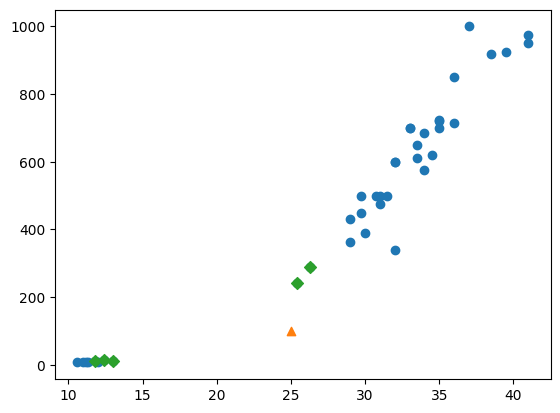

In [169]:
#스케터 차트 그리기

plt.scatter(X_train['길이'],X_train['무게'])
plt.scatter(25,100,marker='^')#새로운 측정 데이터를 '^'로 표시함.
plt.scatter(kne['길이'],kne['무게'],marker='D')
plt.show()

> * x 축의 범위는 10~40 이고 , y 축의 범위는 0~1000 입니다.
> * 스케일이 다르니 y 축으로 조금만 이동을 해도 거리가 아주 큰 값으로 계산됩니다.
> * 따라서 , 각 축의 범위를 동일하게 맞춰줘야한다.

## StandardScaler 적용

In [174]:

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성

scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(X_train)# 훈련용 데이터를 넣어야함.
X_train_scaled = scaler.transform(X_train)
X_train_scaled


array([[-1.95061423, -1.59841597],
       [ 0.34652509,  0.34651717],
       [ 0.20697924,  0.01853519],
       [ 0.61488249,  0.41211356],
       [ 1.04425432,  1.3960595 ],
       [ 0.88323988,  1.65844508],
       [ 0.50753953,  0.51050816],
       [ 0.34652509,  0.34651717],
       [-0.36193844, -0.82765832],
       [-1.90767704, -1.58956046],
       [-1.87547416, -1.59284028],
       [ 0.23918213,  0.01853519],
       [ 0.09963628,  0.01853519],
       [ 0.02449621, -0.43080013],
       [-1.69299113, -1.58136091],
       [ 0.66855397,  0.74009554],
       [-1.88620845, -1.58923248],
       [-1.7573969 , -1.57742513],
       [ 0.56121101,  0.26452167],
       [-1.82180268, -1.58857651],
       [ 0.56121101,  0.62530185],
       [ 0.09963628, -0.1454558 ],
       [ 0.23918213, -0.06346031],
       [-0.26532977, -0.67022697],
       [-1.80033408, -1.58923248],
       [ 1.31261172,  1.4944541 ],
       [ 0.02449621, -0.2110522 ],
       [ 1.15159728,  1.4124586 ],
       [ 0.77589692,

In [175]:
X_train_scaled_df = pd.DataFrame(data = X_train_scaled,columns=['길이','무게'])

In [176]:

kn = KNeighborsClassifier().fit(X_train_scaled_df,y_train)

In [177]:
#모델 예측 25 , 100
scaled = scaler.transform([[25,150]])
## 새로운 데이터에 대해 학습시 적용한 전처리 방법 그대로 적용
kn.predict(scaled)
# kn.predict([[25,150]])

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

# 종합코드

In [142]:
import pandas as pd

#측정한 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

#데이터 프레임으로 만들기
fish_df = pd.DataFrame(fish_data,columns=['길이','무게'])
fish_df['Label'] = fish_target

from sklearn.model_selection import train_test_split   #데이터 셋 분리
from sklearn.metrics import accuracy_score  #분류 평가
from sklearn.neighbors import KNeighborsClassifier # 분류 알고리즘

#피쳐와 라벨 데이터 준비
label = fish_df['Label']
feature = fish_df.drop('Label',axis=1)

#학습/테스트 데이터 세트 준비
X_train,X_test, y_train,y_test = train_test_split(feature ,label,test_size=0.2, random_state=11)


#################################################################################################
# #모델 학습
# kn = KNeighborsClassifier()
# kn =kn.fit(X_train,y_train)

# #모델 예측
# pred = kn.predict(X_test)



In [91]:
kn.predict([[25,150]])

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [147]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()

# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(X_train)# 훈련용 데이터를 넣어야함.
# X_train_scaled = scaler.transform(X_train)
# X_train_scaled

X_train_scaled_df = pd.DataFrame(data = scaler.transform(X_train),columns=['길이','무게'])
kn = KNeighborsClassifier().fit(X_train_scaled_df,y_train)

#모델 예측 25 , 100
scaled = scaler.transform([[25,150]])
## 새로운 데이터에 대해 학습시 적용한 전처리 방법 그대로 적용
kn.predict(scaled)


c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [93]:
type(scaled)


numpy.ndarray

In [122]:
scaled #2차원

array([[-0.40487562, -1.12940174]])

In [123]:
scaled[0] #1차원

array([-0.40487562, -1.12940174])

In [124]:
scaled[0][0] # 길이 1차원 리스트에서 0번쨰

-0.4048756212660349

In [126]:
scaled[0][1] # 무게 1차원 리스트의 1번째

-1.1294017419849198

In [144]:
dist, indexes = kn.kneighbors(scaled)

idx = indexes.tolist()[0]

c:\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [145]:
kne = X_train_scaled_df.iloc[idx]
kne

,길이,무게
8,-0.361938,-0.827658
23,-0.265330,-0.670227
13,0.024496,-0.430800
31,0.131839,-0.342245
34,0.346525,-0.506236


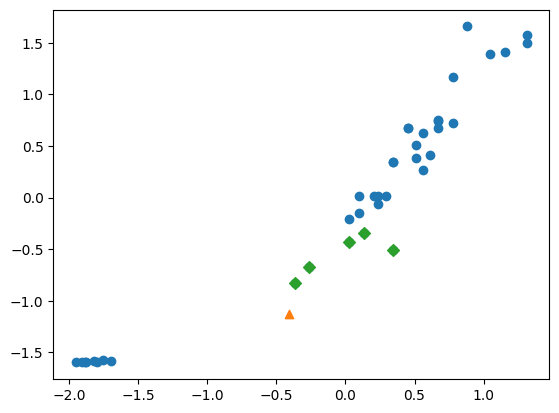

In [146]:
plt.scatter(X_train_scaled_df['길이'],X_train_scaled_df['무게'])
plt.scatter(scaled[0][0],scaled[0][1],marker = '^')
plt.scatter(kne['길이'],kne['무게'],marker="D")
plt.show()